In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display
import random


class Scorelogger():
    
    #Takes in a list of files and creates the scorelogger
    def __init__(self,files:list):
        self.pics_df = None
        self.pics_emotions_df = None
        self.pics_files = files
        self.pics_dict = {}
        self.pics_emotions_dict = {}
        self.pics_list = []
        self.pics_finished = []
        self.emotions_dict = {'a':'happy','b':'timid','c':'sad','d':'playful','e':'mean','f':'content','g':'scared'}
        self.name = ''
        self.preference = ''
    
    #Populates the score df and emotion df with the pictures
    def populate_initial_dfs(self):
        for file in self.pics_files:
            self.pics_dict[file] = []
            self.pics_emotions_dict[file] = []
            self.pics_list.append(file)
        pics = pd.DataFrame(files,columns = ['Path'],index = files)
        self.pics_df = pics.T
    
    #Enters the users score into the dictionary for the appropriate pet
    def enter_score(self,pic:str,score:int):
        self.pics_dict[pic].append(int(score))
        
    #Enters the pet's emotion into the dictionary for the appropriate pet
    def enter_emotion(self,pic:str,emotion:str):
        self.pics_emotions_dict[pic].append(self.emotions_dict[emotion])
        
    #Randomly generate one of the pets from the list
    def _generate_random_pic_name(self) -> str:
        x = random.randint(0,len(self.pics_list)-1)
        pic = self.pics_list.pop(x)
        self.pics_finished.append(pic)
        return pic
        
    #Generates the image of the pet
    def generate_image(self,pic = None)-> Image:
        if pic:
            return display(Image(filename = pic))
        else:
            name = self._generate_random_pic_name()
            return display(Image(filename = name))
        
    #After the user is done, this turns the dictionaries that have been keeping track into dataframes
    def _turn_dict_into_df(self):
        self.pics_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in self.pics_dict.items()]))
        self.pics_emotions_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in self.pics_emotions_dict.items()]))
        
    #Adds the users name to the dataframes
    def _add_name_and_preference_to_df(self):
        self.pics_df['Name'] = self.name
        self.pics_emotions_df['Name']=self.name
        self.pics_df['Preference'] = self.preference
        self.pics_emotions_df['Preference'] = self.preference
        
    #Send results to csv
    def _send_to_csv(self):
        try:
            file = pd.read_csv('Pet_scores.csv')
            file1 = pd.read_csv('Pet_emotions.csv')
            if 'Unnamed: 0' in file.columns:
                file.drop('Unnamed: 0',inplace = True,axis = 1)
            if 'Unnamed: 0' in file1.columns:
                file1.drop('Unnamed: 0',inplace = True,axis = 1)
            if self.name in file.Name.values:
                file.update(self.pics_df,overwrite=False)
                file1.update(self.pics_emotions_df,overwrite=False)
                score = file
                emotion = file1
            else:
                score = pd.concat([file, self.pics_df], ignore_index=True,sort=True)
                emotion = pd.concat([file1, self.pics_emotions_df], ignore_index=True,sort=True)
            score.to_csv('Pet_scores.csv')
            emotion.to_csv('Pet_emotions.csv')
        except FileNotFoundError:
            self.pics_df.to_csv('Pet_scores.csv')
            self.pics_emotions_df.to_csv('Pet_emotions.csv')
            
    #Ends the user's interactive session  
    def end_session(self):
        print('Thank you for your time!')
        print('Please give the program a minute to save your answers... (will say "all done" when finished)')
        print('...')
        self._turn_dict_into_df()
        print('...')
        self._add_name_and_preference_to_df()
        print('...')
        self._send_to_csv()
        print('All done thank you!')
    
    #Begins the user's interactive session
    def activate_session(self):
        
        self.populate_initial_dfs()
        name = 'start_name'
        while not self.valid_name_input(name):
            
            name = input('Please enter your first and last name: ').lower()
            self.name = name
        
        print('_________________________________________________________________________________________________') 
        preference = 'start_preference'
        while not self.valid_preference_input(preference):
            preference = input('Do you prefer cats or dogs or both? ').lower()
            self.preference = preference
        
        print('\nYou will be ranking pets on a scale from 1-10 (10 is cutest)')
        print('If more than one pet is in the picture, put the average of all of them')
        print('At any time, you may type "x" into the bar to quit and save your progress\n')
        input('Press enter to get started!')
        
        while len(self.pics_list)>0:
            pet = self._generate_random_pic_name()
            self.generate_image(pet)
            score = 999
            emotion = ''
            while not self.valid_score_input(score):
                
                score = input("Please rank the cuteness (1-10): ").lower()
            
                if score == "x":
                    self.end_session()
                    return
                
            self.enter_score(pet,score) 
                
            while not self.valid_emotional_input(emotion):
                emotion = input('Would you say this/these animals are: \n\tA)Happy\n\tB)Timid\n\tC)Sad\n\tD)Playful\n\tE)Mean\n\tF)Content\n\tG)Scared\n\t\n\t').lower()
                if emotion == "x":
                    self.end_session()
                    return
            print('_________________________________________________________________________________________')
                
            self.enter_emotion(pet,emotion)
             
        self.end_session()
        return
     

    #Verify that name is valid
    def valid_name_input(self,name:str)-> bool:
        if name != 'start_name' and len(name.split())>0:
            return True
        else:
            if name != 'start_name':
                print('\nInvalid entry\n')
            return False    
    
    #Verify that preference is valid
    def valid_preference_input(self,preference:str)-> bool:
        if preference == 'dogs' or preference == 'cats' or preference == 'both':
            return True
        else:
            if preference != 'start_preference':
                print('\nInvalid entry, please put "cats" or "dogs"\n or "both\n"')
            return False
        
        
    #Verify if the emotion input is valid
    def valid_emotional_input(self,emotion:str)-> bool:
        valid_answers=['a','b','c','d','e','f','g']
        if emotion in valid_answers:
            return True
        else:
            if emotion != '':
                print('\nInvalid entry, please type one of A-G\n')
            return False
     
    #Verify if the score is valid
    def valid_score_input(self,score:str) -> bool:
        valid_answers = [i+1 for i in range(10)]
        try:
            score = int(score)
            if score in valid_answers:
                return True
            else:
                if score != 999:
                    print('\nInvalid entry\n')
                return False
        except ValueError:
            if score != 999:
                print('\nInvalid entry\n')
            return False

#Filter out the files that have already been ranked
def filter_out_ranked_files() -> list:
    file = pd.read_csv('Pet_scores.csv')
    file1 = pd.read_csv('Pet_emotions.csv')
    if 'Unnamed: 0' in file.columns:
        file.drop('Unnamed: 0',inplace = True,axis = 1)
        file.drop('Name',inplace = True,axis = 1)
        file.drop('Preference',inplace = True,axis = 1)
        file.drop('Tester', inplace = True, axis = 1)
    if 'Unnamed: 0' in file1.columns:
        file1.drop('Unnamed: 0',inplace = True,axis = 1)
        file1.drop('Name',inplace = True,axis = 1)
        file1.drop('Preference',inplace = True,axis = 1)
        file1.drop('Tester', inplace = True, axis = 1)
    filtered_list = file.columns[file.isna().any()].tolist()
    return filtered_list

# Filter responses by tester in order to print out how much each person has ranked
def filter_by_tester()-> pd.DataFrame:
    
    file = pd.read_csv('Pet_scores.csv')
    file1 = pd.read_csv('Pet_emotions.csv')
    if 'Unnamed: 0' in file.columns:
        file.drop('Unnamed: 0',inplace = True,axis = 1)
    if 'Unnamed: 0' in file1.columns:
        file1.drop('Unnamed: 0',inplace = True,axis = 1)
    valid_names = ['quan','henry','matthew','vicky','kevin']
    name = 'start_name'
    while name not in valid_names:
        name = input('Count how many records you have recorded by entering your first name: ').lower()    
    filtered = file[file['Tester']==name]
    print('\n\nThe number of pictures that {} has ranked is {} \n The total amount ranked is {} out of {}'.format(name,len(filtered.columns[filtered.notna().any()].tolist())-1,len(file.columns[file.notna().any()].tolist())-1,len(file.columns)-1))


### Begin Session (Press Shift and Enter on cell below, Press x when finished)

Please enter your first and last name: manoj pyla
_________________________________________________________________________________________________
Do you prefer cats or dogs or both? dogs

You will be ranking pets on a scale from 1-10 (10 is cutest)
If more than one pet is in the picture, put the average of all of them
At any time, you may type "x" into the bar to quit and save your progress

Press enter to get started!


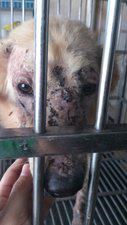

Please rank the cuteness (1-10): 3
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


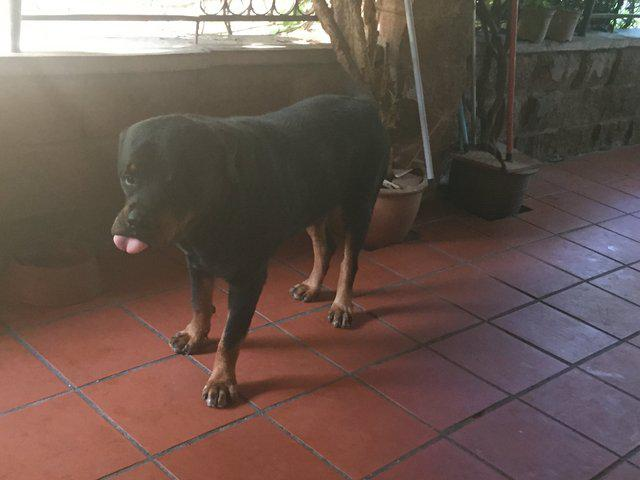

Please rank the cuteness (1-10): 2
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


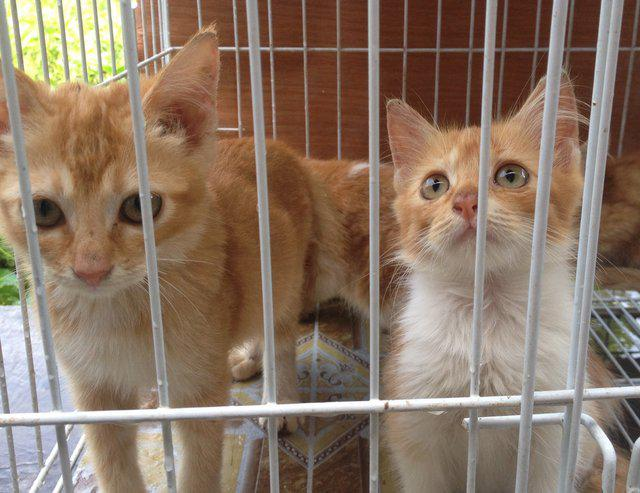

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


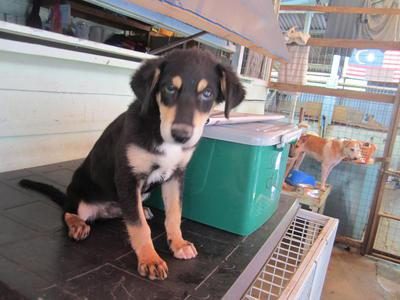

Please rank the cuteness (1-10): 5
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	F
_________________________________________________________________________________________


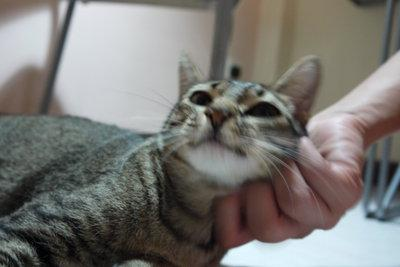

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


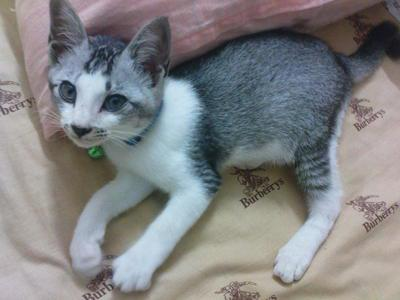

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


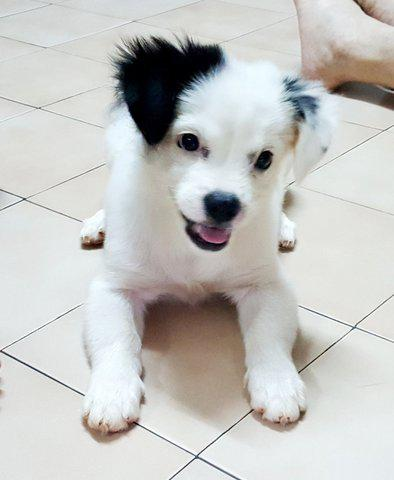

Please rank the cuteness (1-10): 6
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	D
_________________________________________________________________________________________


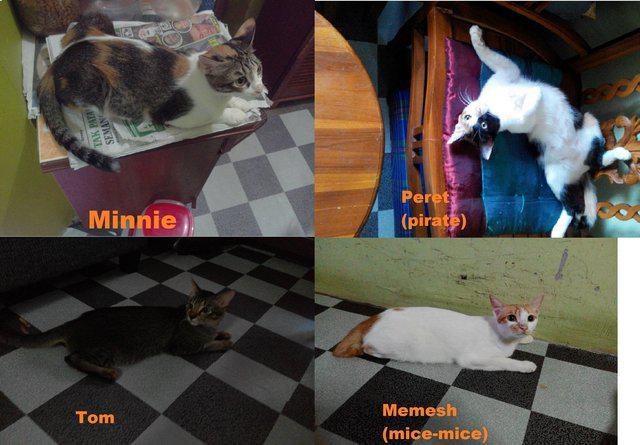

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


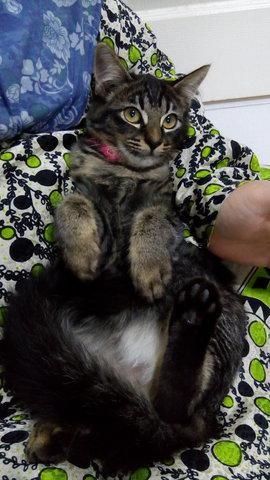

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


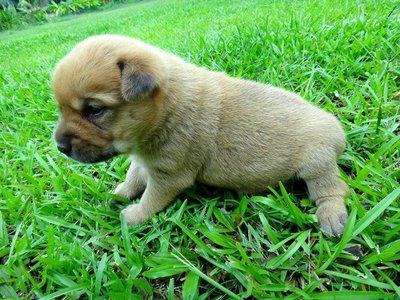

Please rank the cuteness (1-10): 6
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


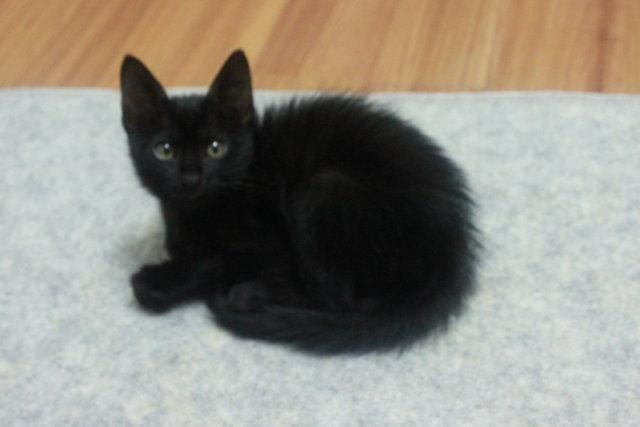

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


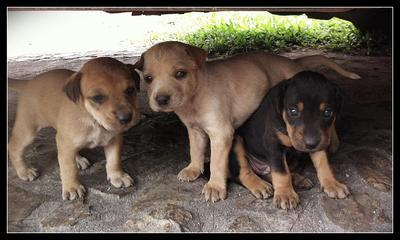

Please rank the cuteness (1-10): 6
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	D
_________________________________________________________________________________________


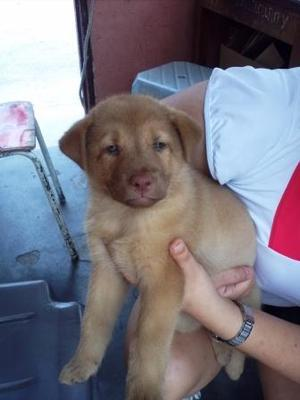

Please rank the cuteness (1-10): 6
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	B
_________________________________________________________________________________________


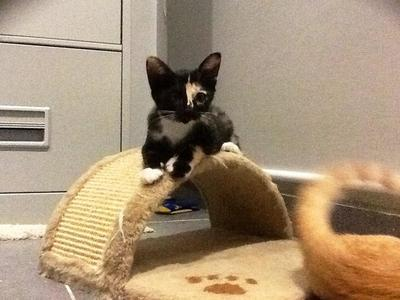

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


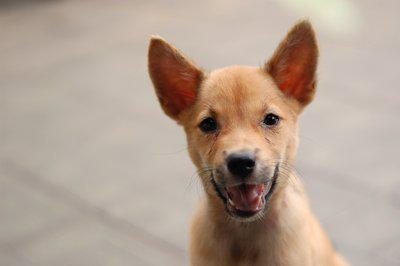

Please rank the cuteness (1-10): 6
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	E
_________________________________________________________________________________________


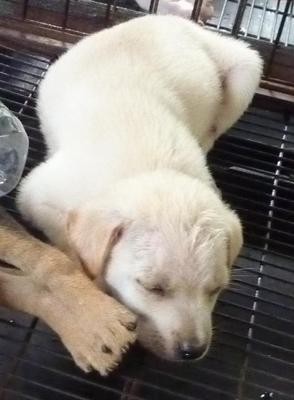

Please rank the cuteness (1-10): 7
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	A
_________________________________________________________________________________________


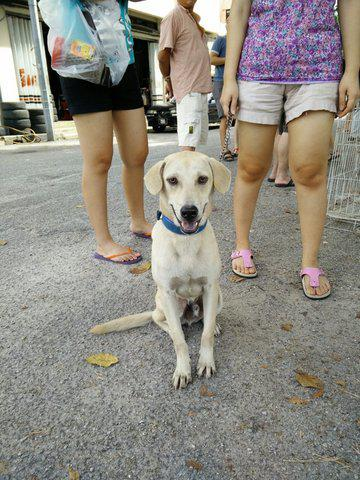

Please rank the cuteness (1-10): 7
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	D
_________________________________________________________________________________________


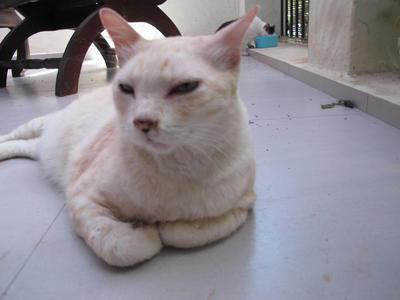

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


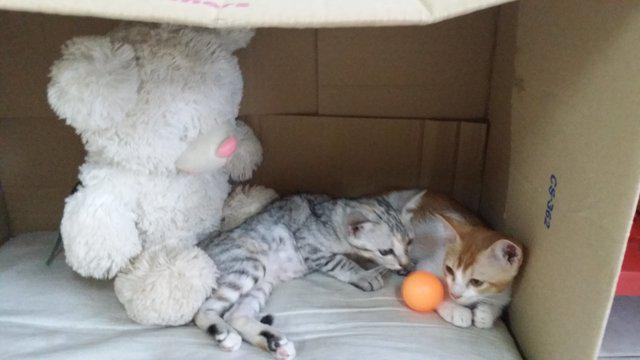

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


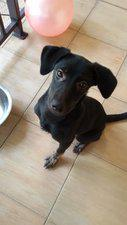

Please rank the cuteness (1-10): 8
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	D
_________________________________________________________________________________________


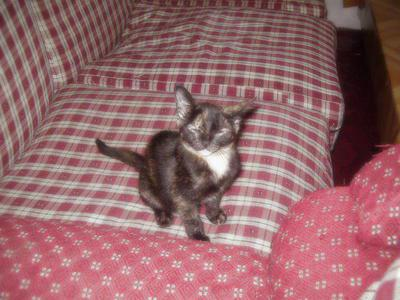

Please rank the cuteness (1-10): 1
Would you say this/these animals are: 
	A)Happy
	B)Timid
	C)Sad
	D)Playful
	E)Mean
	F)Content
	G)Scared
	
	G
_________________________________________________________________________________________


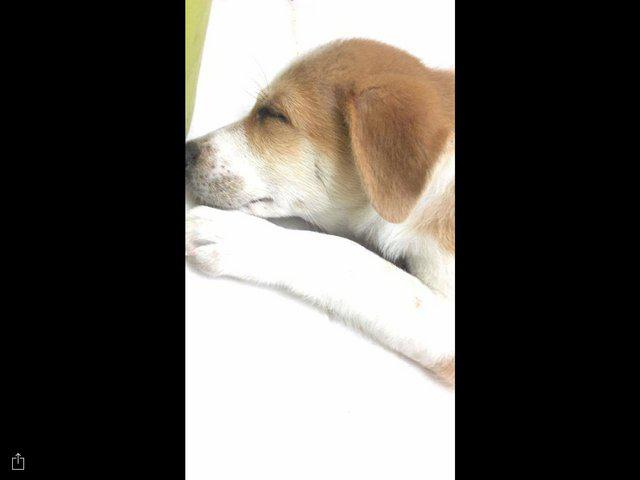

Please rank the cuteness (1-10): 

Invalid entry

Please rank the cuteness (1-10): 

Invalid entry

Please rank the cuteness (1-10): x
Thank you for your time!
Please give the program a minute to save your answers... (will say "all done" when finished)
...
...
...
All done thank you!


In [2]:
##### files = pd.read_csv('10k_files.csv').files.values.tolist()
files = filter_out_ranked_files()
session = Scorelogger(files)
session.activate_session()



### Check how many pictures have been rated

In [3]:
filter_by_tester()

Count how many records you have recorded by entering your first name: matthew


The number of pictures that matthew has ranked is 880 
 The total amount ranked is 1908 out of 10004
